In [63]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud,STOPWORDS

In [2]:
path = 'twitter_training.csv'
df = pd.read_csv(path)
df.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.shape

(74681, 4)

In [4]:
df_need = df[:10000]
df_need.shape

(10000, 4)

In [5]:
df_need.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
df_need.columns = ['user_id','user_name','label','text']

In [7]:
df_need[['text','label']].to_csv('train_data.csv')

In [9]:
train_df = pd.read_csv("train_data.csv")
train_df.head()

,Unnamed: 0,text,label
0,0,I am coming to the borders and I will kill you...,Positive
1,1,im getting on borderlands and i will kill you ...,Positive
2,2,im coming on borderlands and i will murder you...,Positive
3,3,im getting on borderlands 2 and i will murder ...,Positive
4,4,im getting into borderlands and i can murder y...,Positive


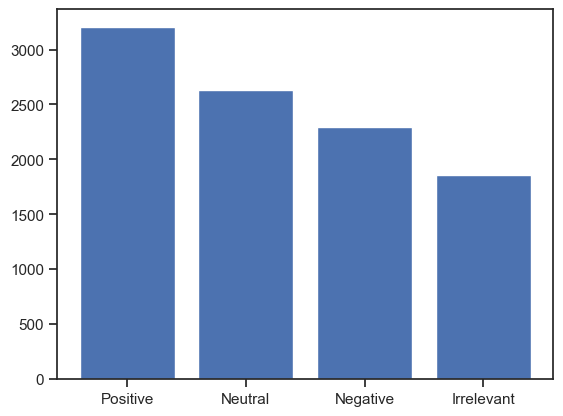

In [39]:
values = dict(train_df['label'].value_counts())
plt.bar(values.keys(),values.values())
plt.show()

In [41]:
train_df.isnull().sum()

Unnamed: 0      0
text          112
label           0
dtype: int64

In [42]:
train_df.dropna(inplace = True)
train_df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

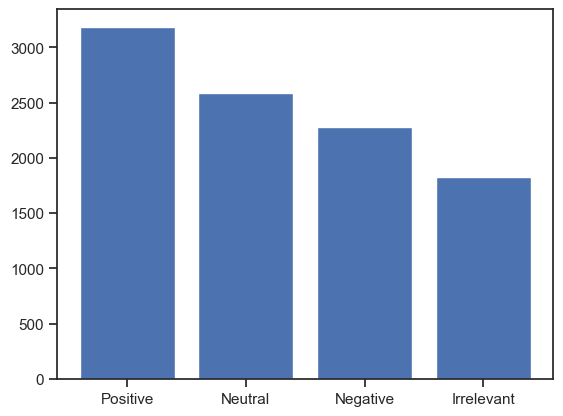

In [43]:
values = dict(train_df['label'].value_counts())
plt.bar(values.keys(),values.values())
plt.show()

In [48]:
def calculate_average_length(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    all_lengths = []
    for seq in sequences:
        length = len(seq)
        all_lengths.append(length)
    
    print("95 percent of the texts are less than: " + str(np.percentile(all_lengths,95)))
    print("Average text length is: " + str(np.mean(all_lengths)))

In [49]:
calculate_average_length(train_df['text'])

95 percent of the texts are less than: 49.0
Average text length is: 19.743325242718445


In [58]:
text = " ".join(review for review in train_df.text)

In [64]:
stopwords = set(STOPWORDS)
word_cloud = WordCloud(stopwords=stopwords,collocations = False, background_color = 'white').generate(text)

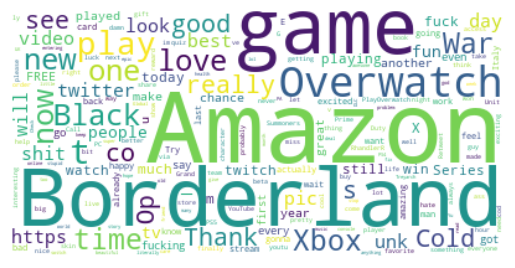

In [65]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()